In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('income.csv')

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


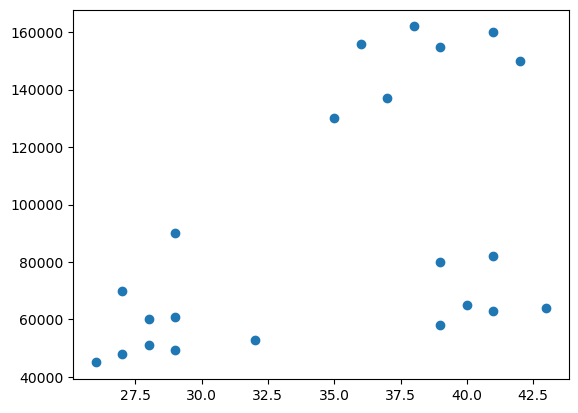

In [5]:
plt.scatter(df['Age'],df['Income($)'])

In [12]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [13]:
km = KMeans(n_clusters=3)

In [15]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [16]:
df['cluster'] = y_predicted

In [18]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


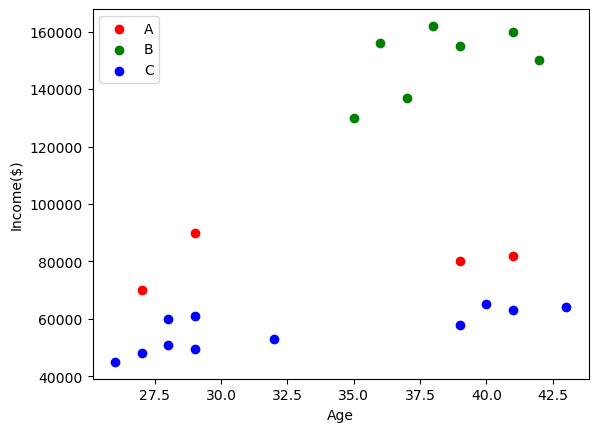

In [25]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['Age'],df0['Income($)'],color='red',label='A')
plt.scatter(df1['Age'],df1['Income($)'],color='green',label='B')
plt.scatter(df2['Age'],df2['Income($)'],color='blue',label='C')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

*There is some problem for too less **Age range** than **Income range**. Fixing it by scaling* 

**MinMaxScaler**

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [66]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [67]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


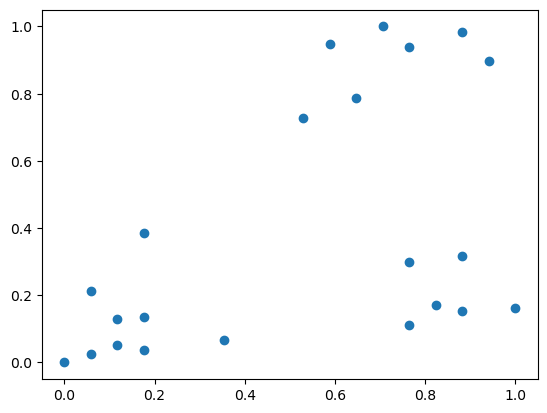

In [39]:
plt.scatter(df['Age'],df['Income($)'])

In [40]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [43]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [45]:
clusters = km.cluster_centers_
clusters

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

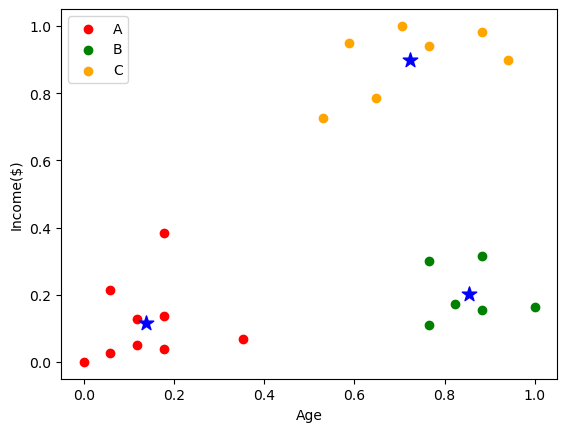

In [68]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['Age'],df0['Income($)'],color='red',label='A')
plt.scatter(df1['Age'],df1['Income($)'],color='green',label='B')
plt.scatter(df2['Age'],df2['Income($)'],color='orange',label='C')
plt.scatter(clusters[:,0],clusters[:,1],color='blue',marker='*',s=120)

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

### Elbow techniue

In [58]:
sse = []
k_rng = range(1,10)

In [59]:
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [60]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530933,
 0.3491047094419564,
 0.26217927623452125,
 0.22443334487241415,
 0.1729962193245546,
 0.13265419827245162,
 0.11182079723210353]

Text(0, 0.5, 'SSE')

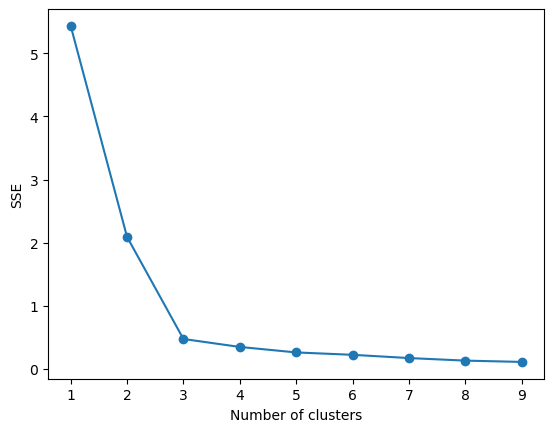

In [65]:
plt.scatter(k_rng,sse)
plt.plot(k_rng,sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

*According to **Elbow technique** from the data visualization we can say **K=3** is best for the dataset*